In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision.utils import make_grid
from utils import MNISTDataModule
from evaluate import *
from models import VAE
from icecream import ic

Original images


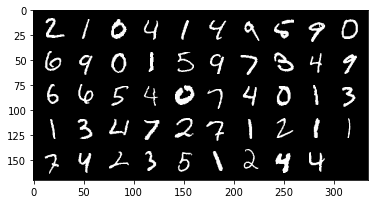

Reconstructed images


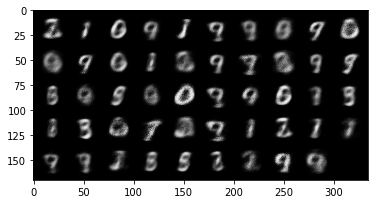

In [19]:
PATH = '../models/MLP_latent16.ckpt'

BATCH_SIZE = 128
seed = 2
INPUT_DIM = 28*28
LATENT_DIM = 16
LEARNING_RATE = 1e-4 #1e-3 pour MLP
MAX_EPOCHS = 30
ENC_OUT_DIM = 16 #Par exemple 64 pour LinearModel, 8 pour CNN
MODEL_TYPE = 'MLP'

vae = VAE.load_from_checkpoint(PATH, input_dim=INPUT_DIM, enc_out_dim=ENC_OUT_DIM, latent_dim=LATENT_DIM, learning_rate=LEARNING_RATE, model_type=MODEL_TYPE)
datamodule = MNISTDataModule()
datamodule.prepare_data()
datamodule.setup(stage='test')
test_dataloader = datamodule.test_dataloader()
vae.eval()
reconstruction(test_dataloader, vae, model_type=MODEL_TYPE, input_dim=INPUT_DIM)

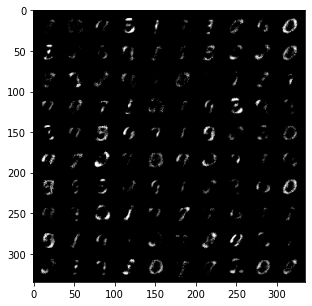

In [21]:
generate(vae)

ic| pred.shape: torch.Size([16, 1, 784])
ic| pred.shape: torch.Size([16, 1, 28, 28])


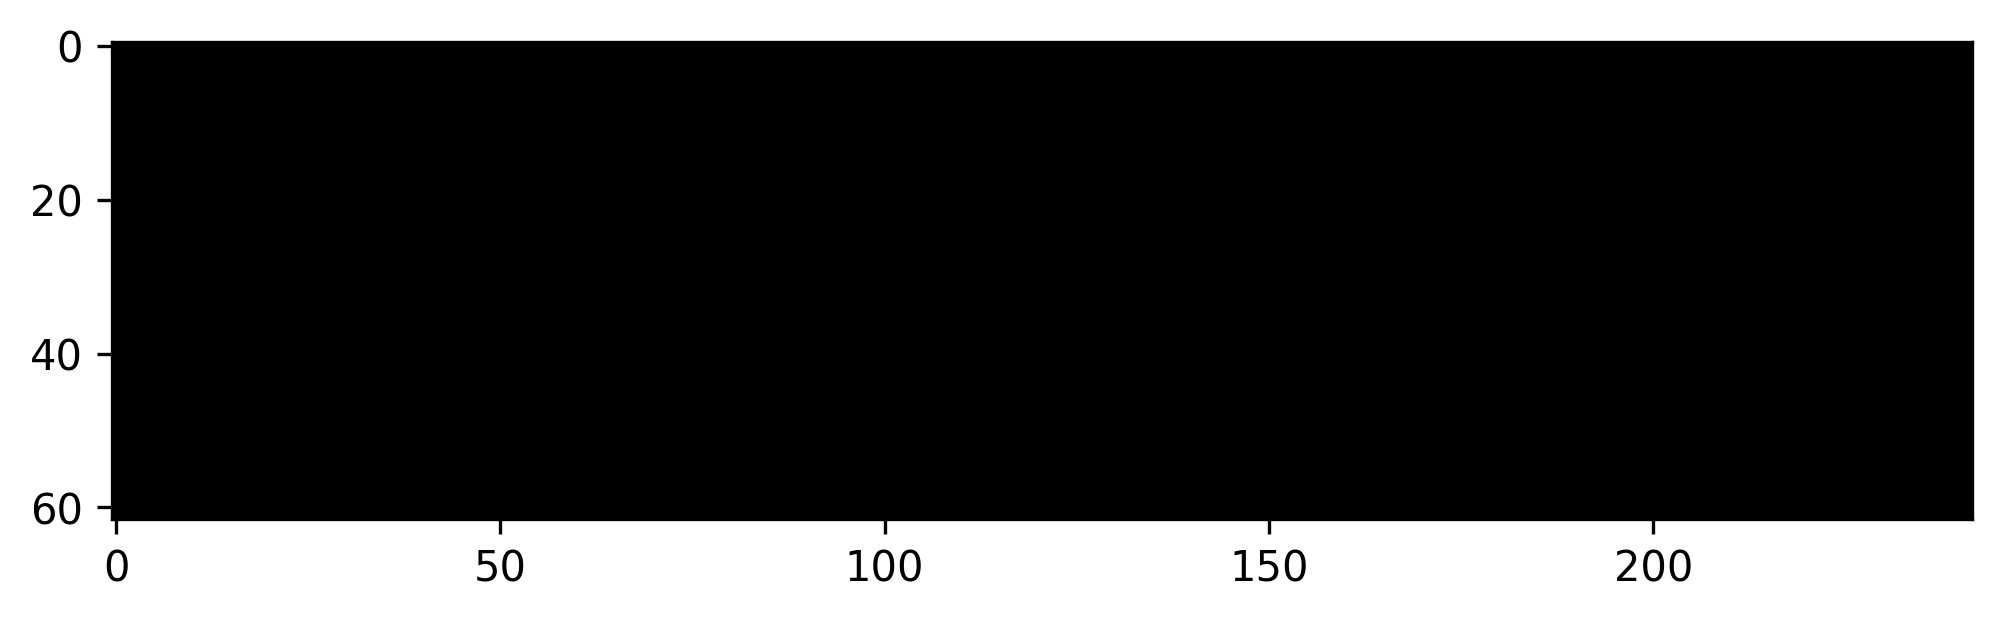

In [4]:
from matplotlib.pyplot import imshow, figure
import numpy as np
from torchvision.utils import make_grid
from torchvision import transforms
figure(figsize=(8, 3), dpi=300)

# Z COMES FROM NORMAL(0, 1)
num_preds = 16
p = torch.distributions.Normal(torch.zeros(1, LATENT_DIM), torch.ones(1, LATENT_DIM))
z = p.rsample((num_preds,))

# SAMPLE IMAGES
with torch.no_grad():
    pred = model.decoder(z.to(model.device)).cpu()
    ic(pred.shape)
    pred = pred.view(pred.shape[0], pred.shape[1], 28, 28)
    ic(pred.shape)


# UNDO DATA NORMALIZATION
img = make_grid(pred).permute(1, 2, 0).numpy()

# PLOT IMAGES
imshow(img)